# `Case Study Linear Regression`

### Liabraries

In [277]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression

from warnings import filterwarnings
filterwarnings(action='ignore')

### Sample data points

In [278]:
X,y = make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=30,random_state=53)

In [279]:
df = pd.DataFrame(np.concatenate([X,np.expand_dims(y,1)],axis=1),columns=['X','y'])
df.head()

,X,y
0,0.503622,34.658894
1,1.802009,158.915555
2,-0.623148,-72.306025
3,-0.406043,-29.432096
4,-0.617011,-26.333059


### taking absolute values

In [280]:
X = np.abs(X)
y = np.abs(y)

In [281]:
df = pd.DataFrame(np.concatenate([X,np.expand_dims(y,1)],axis=1),columns=['X','y'])
df.head()

,X,y
0,0.503622,34.658894
1,1.802009,158.915555
2,0.623148,72.306025
3,0.406043,29.432096
4,0.617011,26.333059


In [282]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=45)

### Data points

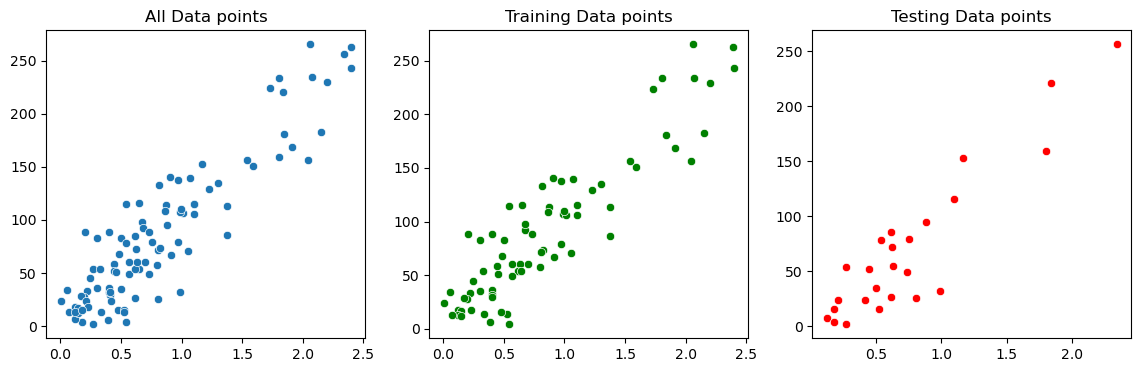

In [283]:
fig,ax = plt.subplots(1,3,figsize=(14,4))

plt.subplot(131)
sns.scatterplot(X.flatten(),y.flatten())
plt.title("All Data points")
plt.subplot(132)
sns.scatterplot(X_train.flatten(),y_train.flatten(),color='g')
plt.title("Training Data points")
plt.subplot(133)
sns.scatterplot(X_test.flatten(),y_test.flatten(),color='r')
plt.title("Testing Data points")
plt.show()

$$
\Large\ Loss = \Large\sum _{n=1}^{n=100}\left(y_{actual}-y_{predicted}\right)^2
$$

$$
\Large\ y_{predicted}\ =m x\ +\ c
$$

$$
\Large\ Loss = \Large\sum _{n=1}^{n=100}\left(y_{actual}-\left(mx\ +\ c\right)\right)^2
$$

$$
\Large slope_{intercept}=\Large\frac{∂\ Loss}{∂\ c}=2 \sum _{n=1}^{n=100}\left(y - m𝑥-𝑐)\right)\left(-1\right)
$$

$$
\Large slope_{coefficient}=\Large\frac{∂\ Loss}{∂\ m}=2 \sum _{n=1}^{n=100}\left(y - m𝑥-𝑐)\right)\left(-x\right)
$$

$$
\Large\ c_{new}\ = c_{old}\ -\ learning \ rate * slope_{intercept} 
$$

$$
\Large\ m_{new}\ = m_{old}\ -\ learning \ rate * slope_{coefficient} 
$$

In [284]:
X_train_1 = X_train
y_train_1 = y_train

## Tuning Intercept for minimum loss

In [285]:
epoch = 40
# Initializing intercept
intercept = 10
learning_rate = 0.0001
loss_list = []
intercept_list = []
flag = 0
for i in range(epoch):
    # calculation of y_predicted using current intercept
    y_pred_manual = (97.72465207*X_train_1.ravel()) + intercept
    
    # calculating total loss corresponding to current intercept
    loss = np.sum(np.square(y_train_1 - y_pred_manual))
    if (len(loss_list) > 2) and (loss > loss_list[-1]) and flag==0:
        print(f"Minimum loss - {loss_list[-1]:0.4f}")
        print("-"*50)
        Min_loss_intercept = round(loss_list[-1],4)
        flag = 1
    
    loss_list.append(loss)
    
    # Slope for gradint, i.e derivative wrt to intercept 
    intercept_slope = -2*np.sum(y_train_1-y_pred_manual-intercept)
    
    # calculated step size
    step_size = learning_rate * intercept_slope 
    intercept = intercept - step_size
    if flag == 1:
        Global_minima_intercept = round(intercept_list[-1],4)
        print(f"Intercept corresponding to minimum loss- {Global_minima_intercept:0.4f}")
        flag = 2
    intercept_list.append(intercept)

Minimum loss - 55333.6284
--------------------------------------------------
Intercept corresponding to minimum loss- 8.3660


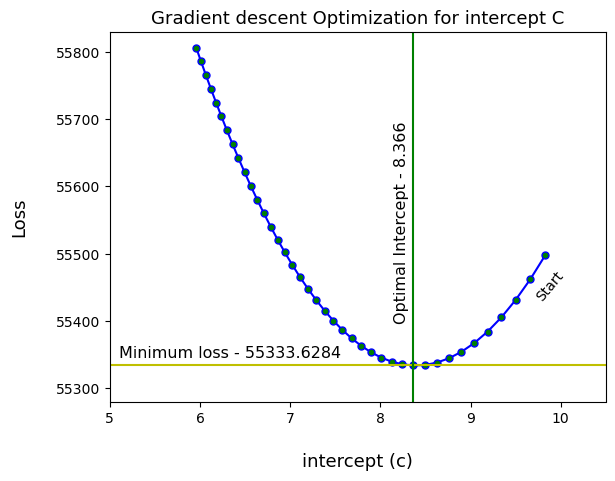

In [286]:
plt.plot(intercept_list,loss_list,marker='o',ms=5,color='b',mfc='g')
plt.axhline(y=Min_loss_intercept,c='y')
plt.axvline(x=Global_minima_intercept,c='g')
plt.title("Gradient descent Optimization for intercept C",fontsize=13)
plt.ylabel("Loss",fontsize=13,labelpad=20)
plt.xlabel("intercept (c)",fontsize=13,labelpad=20)
plt.text(5.1,55345,f"Minimum loss - {Min_loss_intercept}",fontsize=11.5)
plt.text(8.15,55400,f"Optimal Intercept - {Global_minima_intercept}",rotation=90,fontsize=11.5)
plt.text(9.7,55430,"Start",rotation=50)
plt.xlim(left=5,right=10.5)
plt.ylim(bottom=55280)
plt.show()

## Tuning slope for minimum loss

In [287]:
epoch = 30
# Initializing the slope
m = 100
learning_rate = 0.0001
loss_m_list = []  #list to fill loss at each step
slope_list = []   #list to fill corresponding slopes at each loss
flag1 = 0
for i in range(epoch):
    # calculation of y_predicted using current intercept
    y_pred_manual = (m*X_train_1.ravel()) + 8.520901857856273
    
    # calculating total loss corresponding to current intercept
    loss_m = np.sum(np.square(y_train_1.ravel() - y_pred_manual))
    
    # Printing the loss where calculated loss is more than previous loss
    # i.e printing the minimum loss where loss starts increasing
    # The below if block only executes once
    if (len(loss_m_list) > 2) and (loss_m > loss_m_list[-1]) and flag1==0:
        print(f"Minimum loss - {loss_m_list[-1]:0.4f}")
        print("-"*50)
        Min_loss_slope = round(loss_m_list[-1],4)
        flag1 = 1
    loss_m_list.append(loss_m)

    # Slope for gradint, i.e derivative wrt to intercept 
    slope_m = -2*np.sum((y_train_1.ravel()-y_pred_manual-8.520901857856273)*X_train_1.ravel())
    
    # calculated step size
    step_size = learning_rate * slope_m
    m = m - step_size
    # printing the slope corresponding to minimum loss
    # The below if block only executes once
    if flag1 == 1:
        Global_minima_slope = round(slope_list[-1],4)
        print(f"Slope corresponding to minimum loss- {Global_minima_slope:0.4f}")
        flag1 = 2
    slope_list.append(m)

Minimum loss - 55333.5697
--------------------------------------------------
Slope corresponding to minimum loss- 97.6169


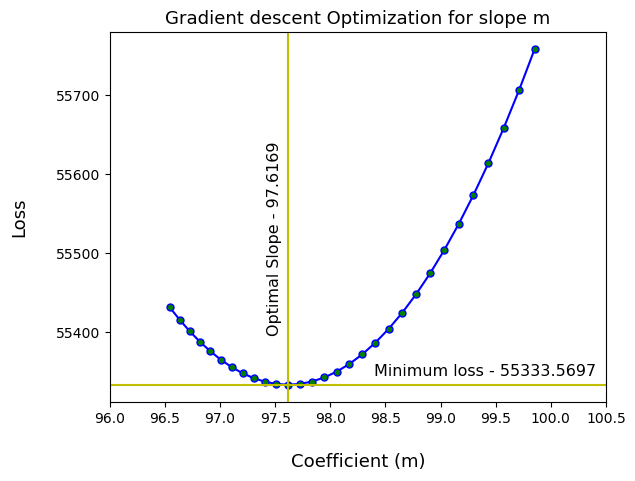

In [288]:
plt.plot(slope_list,loss_m_list,marker='o',ms=5,color='b',mfc='g')
plt.axhline(y=Min_loss_slope,c='y')
plt.axvline(x=Global_minima_slope,c='y')
plt.title("Gradient descent Optimization for slope m",fontsize=13)
plt.ylabel("Loss",fontsize=13,labelpad=20)
plt.xlabel("Coefficient (m)",fontsize=13,labelpad=20)
plt.text(98.40,55345,f"Minimum loss - {Min_loss_slope}",fontsize=11.5)
plt.text(97.43,55400,f"Optimal Slope - {Global_minima_slope}",rotation=90,fontsize=11.5)
plt.xlim(left=96,right=100.5)
plt.show()

In [312]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [326]:
print(f"Intercept calculated from Manual Gradient descent Optimization - {Global_minima_slope:0.4f}")
print(f"Intercept from sklearn class Linear model - {model.coef_[0]:0.4f}")
print("-"*75)
print(f"Intercept calculated from Manual Gradient descent Optimization - {Global_minima_intercept:0.4f}")
print(f"Intercept from sklearn class Linear model - {model.intercept_:0.4f}")

Intercept calculated from Manual Gradient descent Optimization - 97.6169
Intercept from sklearn class Linear model - 97.7247
---------------------------------------------------------------------------
Intercept calculated from Manual Gradient descent Optimization - 8.3660
Intercept from sklearn class Linear model - 8.5209


In [327]:
from sklearn.metrics import mean_squared_error as mse

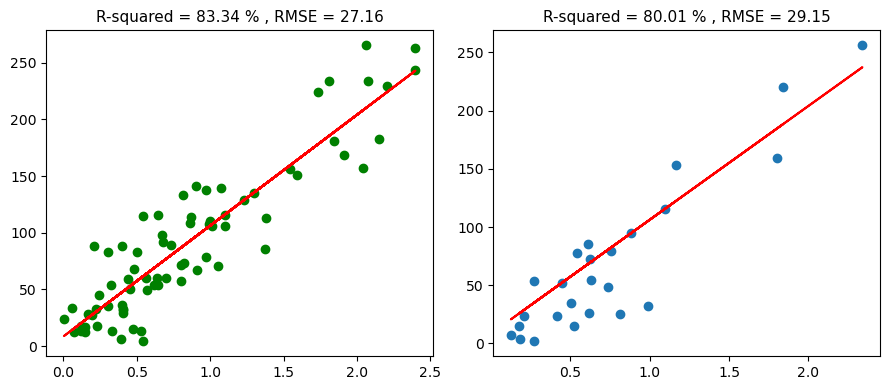

In [341]:
plt.figure(figsize=(9,4))
plt.subplot(121)
plt.scatter(X_train,y_train,label='Data points',c='g')
plt.plot(X_train,model.predict(X_train),'r-',label='Best fit line')
RMSE_train = mse(y_train,model.predict(X_train),squared=False)
plt.title(f"R-squared = {r2_score(y_train,model.predict(X_train))*100:0.2f} % , RMSE = {RMSE_train:0.2f}",
          fontsize=11)

plt.subplot(122)
plt.scatter(X_test,y_test,label='Data points')
RMSE_test = mse(y_test,model.predict(X_test),squared=False)
plt.plot(X_test,model.predict(X_test),'r-',label='Best fit line')
plt.title(f"R-squared = {r2_score(y_test,model.predict(X_test))*100:0.2f} % , RMSE = {RMSE_test:0.2f}",fontsize=11)
plt.tight_layout()
plt.show()